In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Identical
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from scipy.optimize import curve_fit

In [55]:
seed = 9
N = 500
theta_random,omega,Kc = Identical(N,0,1,seed=seed)
omega = np.sort(omega)
m = 2
t = np.arange(0,500,0.1)
K = 0.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [119]:
def get_tau(K,m):
    _,_,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
    func = lambda t,A,tau_inv: A*np.exp(-tau_inv*t)
    t_sample= t[np.where(rs<0.65)]
    r_sample= rs[np.where(rs<0.65)]
    popt, pcov = curve_fit(func,t_sample,r_sample)
    tau = -1/popt[1]
    return tau

In [120]:
function = lambda K,m:get_tau(K,m)
get_tau_numpy = np.vectorize(function)

In [150]:
Ks = np.logspace(np.log10(0.1),np.log10(10),20)

In [151]:
ms = np.linspace(0.1,10,20)

In [152]:
KK,MM = np.meshgrid(Ks,ms)

In [153]:
taus = get_tau_numpy(KK,MM)

In [104]:
abs(taus).T.shape

(10, 50)

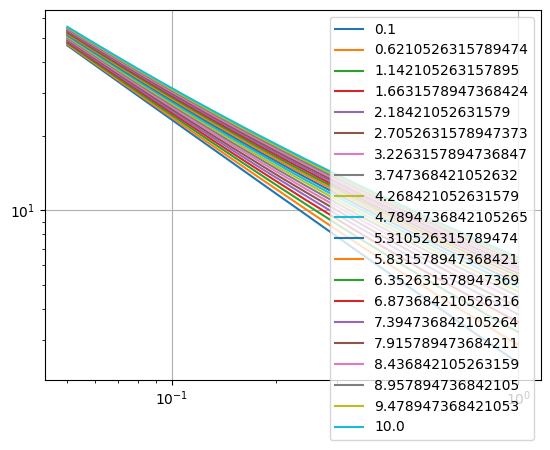

In [144]:
plt.plot(Ks,abs(taus).T,label = ms)
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.grid()

In [148]:
fit_2 = lambda K,A,B: B*K**-A

-0.9804029486897472
-0.9060393130975862
-0.8605561521671978
-0.8272909176368946
-0.8048899780076231
-0.7853463413349232
-0.7692637948516632
-0.7562564694399637
-0.7451876615449239
-0.7345199299664158
-0.7260554773107117
-0.718351444619415
-0.7112345163105702
-0.7051923230464785
-0.6985920762681729
-0.6931301194893864
-0.6882740911267248
-0.6839310327299903
-0.6803602445189847
-0.6760368408652546


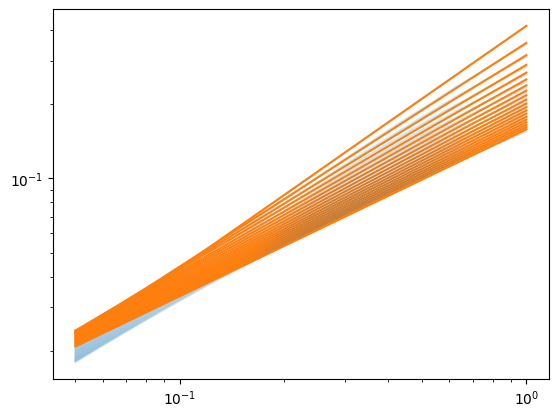

In [149]:
for i,m in enumerate(ms):
    popt, pcov = curve_fit(fit_2,Ks,1/taus[i])
    plt.plot(Ks,abs(1/taus[i]),color ='tab:blue',alpha=0.2)
    plt.plot(Ks,fit_2(Ks,*popt),color = 'tab:orange')
    plt.xscale('log')
    plt.yscale('log')
    print(popt[0])

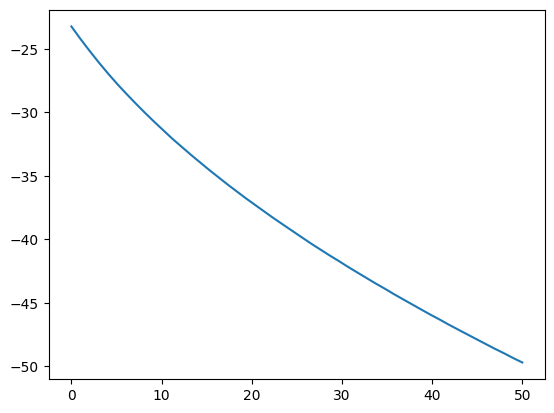

In [71]:
plt.plot(ms,taus)

In [56]:
func = lambda t,A,tau_inv: A*np.exp(-tau_inv*t)

In [57]:
t_sample= t[np.where(rs<0.65)]
r_sample= rs[np.where(rs<0.65)]

In [58]:
popt, pcov = curve_fit(func,t_sample,r_sample)
1/popt[1]

-25.138422019496907

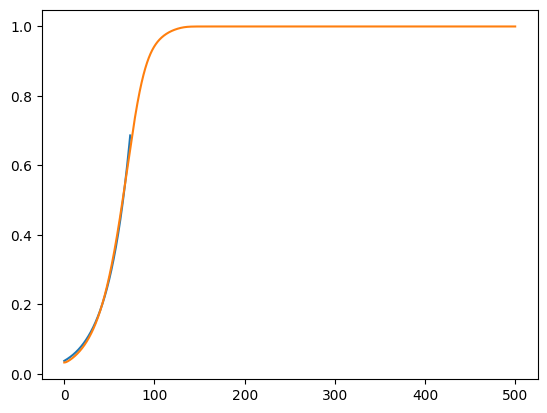

In [59]:
plt.plot(t_sample,func(t_sample,*popt))
plt.plot(t,rs)
# plt.xscale('log')
# plt.yscale('log')